<a href="https://colab.research.google.com/github/karim-mammadov/My_Elevvo_Pathways_Tasks/blob/main/Sales_Forecasting_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sales Forecasting
## Description
The goal of this task is to **predict future sales** using the Walmart Sales Forecast dataset from Kaggle.  
The project focuses on creating **time-based features, training regression models for forecasting**, and visualizing predictions versus actual sales.

### Steps:
1. Load the dataset into a pandas DataFrame.  
2. Explore the dataset and understand its structure.  
3. Create time-based features (day, month, year, lag features).  
4. Split the dataset into training and testing sets.  
5. Train regression models for forecasting (e.g., Linear Regression, Random Forest).  
6. Evaluate performance using **MAE, RMSE, or MAPE**.  
7. Plot actual vs. predicted sales over time.  

### Tools & Libraries
- Python  
- Pandas  
- NumPy  
- Matplotlib / Seaborn  
- Scikit-learn  

### Covered Topics
- Time-Series Forecasting  
- Feature Engineering for Temporal Data  
- Regression Models  
- Model Evaluation Metrics  



In [ ]:
!kaggle datasets download aslanahmedov/walmart-sales-forecast

In [ ]:
!ls

sample_data


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aslanahmedov/walmart-sales-forecast")

print("Path to dataset files:", path)

100%|██████████| 3.36M/3.36M [00:00<00:00, 126MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aslanahmedov/walmart-sales-forecast/versions/1


## Load the dataset

In [ ]:
import pandas as pd
import os

dataset_path = '/root/.cache/kagglehub/datasets/aslanahmedov/walmart-sales-forecast/versions/1'
train_csv_path = os.path.join(dataset_path, 'train.csv')

df_train = pd.read_csv(train_csv_path)
display(df_train.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Explore and preprocess the data

In [ ]:
print("Data types of each column:")
display(df_train.dtypes)

print("\nMissing values per column:")
display(df_train.isnull().sum())

df_train['Date'] = pd.to_datetime(df_train['Date'])

print("\n'Date' column after conversion:")
display(df_train['Date'].head())

Data types of each column:


,0
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday,bool



Missing values per column:


,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0



'Date' column after conversion:


,Date
0,2010-02-05
1,2010-02-12
2,2010-02-19
3,2010-02-26
4,2010-03-05


## Create time-based features



In [ ]:
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day
df_train['WeekOfYear'] = df_train['Date'].dt.isocalendar().week.astype(int)

df_train = df_train.sort_values(by=['Store', 'Dept', 'Date'])
df_train['Weekly_Sales_Lag1'] = df_train.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
df_train['Weekly_Sales_Lag1'] = df_train['Weekly_Sales_Lag1'].fillna(0)

display(df_train.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Day,WeekOfYear,Weekly_Sales_Lag1
0,1,1,2010-02-05,24924.50,False,2010,2,5,5,0.00
1,1,1,2010-02-12,46039.49,True,2010,2,12,6,24924.50
2,1,1,2010-02-19,41595.55,False,2010,2,19,7,46039.49
3,1,1,2010-02-26,19403.54,False,2010,2,26,8,41595.55
4,1,1,2010-03-05,21827.90,False,2010,3,5,9,19403.54


## Split data into training and testing sets


In [ ]:
split_date = '2012-01-01'

df_train_split = df_train[df_train['Date'] < split_date].copy()
df_test_split = df_train[df_train['Date'] >= split_date].copy()

columns_to_drop = ['Date', 'filename', 'length']
existing_columns_to_drop = [col for col in columns_to_drop if col in df_train.columns]

X_train = df_train_split.drop(['Weekly_Sales'] + existing_columns_to_drop, axis=1)
y_train = df_train_split['Weekly_Sales']

X_test = df_test_split.drop(['Weekly_Sales'] + existing_columns_to_drop, axis=1)
y_test = df_test_split['Weekly_Sales']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

print("\nX_train head:")
display(X_train.head())
print("\ny_train head:")
display(y_train.head())

Shape of X_train: (294132, 8)
Shape of y_train: (294132,)
Shape of X_test: (127438, 8)
Shape of y_test: (127438,)

X_train head:


,Store,Dept,IsHoliday,Year,Month,Day,WeekOfYear,Weekly_Sales_Lag1
0,1,1,False,2010,2,5,5,0.00
1,1,1,True,2010,2,12,6,24924.50
2,1,1,False,2010,2,19,7,46039.49
3,1,1,False,2010,2,26,8,41595.55
4,1,1,False,2010,3,5,9,19403.54



y_train head:


,Weekly_Sales
0,24924.50
1,46039.49
2,41595.55
3,19403.54
4,21827.90


## Apply regression models


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

**Reasoning**:
Instantiate and train the chosen regression models using the training data.



In [ ]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model = lgb.LGBMRegressor(objective='regression', n_estimators=100, learning_rate=0.1, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

print("Models trained successfully.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 294132, number of used features: 8
[LightGBM] [Info] Start training from score 16105.306894
Models trained successfully.


## Evaluate the models

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
lgb_predictions = lgb_model.predict(X_test)

print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, lr_predictions))
print("MSE:", mean_squared_error(y_test, lr_predictions))
print("R-squared:", r2_score(y_test, lr_predictions))
print("-" * 30)

print("Random Forest Metrics:")
print("MAE:", mean_absolute_error(y_test, rf_predictions))
print("MSE:", mean_squared_error(y_test, rf_predictions))
print("R-squared:", r2_score(y_test, rf_predictions))
print("-" * 30)

print("XGBoost Metrics:")
print("MAE:", mean_absolute_error(y_test, xgb_predictions))
print("MSE:", mean_squared_error(y_test, xgb_predictions))
print("R-squared:", r2_score(y_test, xgb_predictions))
print("-" * 30)

print("LightGBM Metrics:")
print("MAE:", mean_absolute_error(y_test, lgb_predictions))
print("MSE:", mean_squared_error(y_test, lgb_predictions))
print("R-squared:", r2_score(y_test, lgb_predictions))
print("-" * 30)

Linear Regression Metrics:
MAE: 2279.238296781955
MSE: 17156954.19706585
R-squared: 0.9649367616033544
------------------------------
Random Forest Metrics:
MAE: 1595.227170159607
MSE: 12408529.241906358
R-squared: 0.9746409989813275
------------------------------
XGBoost Metrics:
MAE: 1633.546742416555
MSE: 12807987.502081288
R-squared: 0.9738246361208135
------------------------------
LightGBM Metrics:
MAE: 1616.4606609494456
MSE: 12759475.882109286
R-squared: 0.9739237781058389
------------------------------


## Forecast future sales

In [ ]:
best_model = rf_model

best_model_predictions = best_model.predict(X_test)

print("First 10 predictions from the best model:")
display(best_model_predictions[:10])

First 10 predictions from the best model:


array([24932.6887, 15530.384 , 15980.0363, 19697.8357, 21066.0719,
       30576.5814, 33991.1265, 54229.8519, 28917.6809, 18531.6811])

## Visualize results

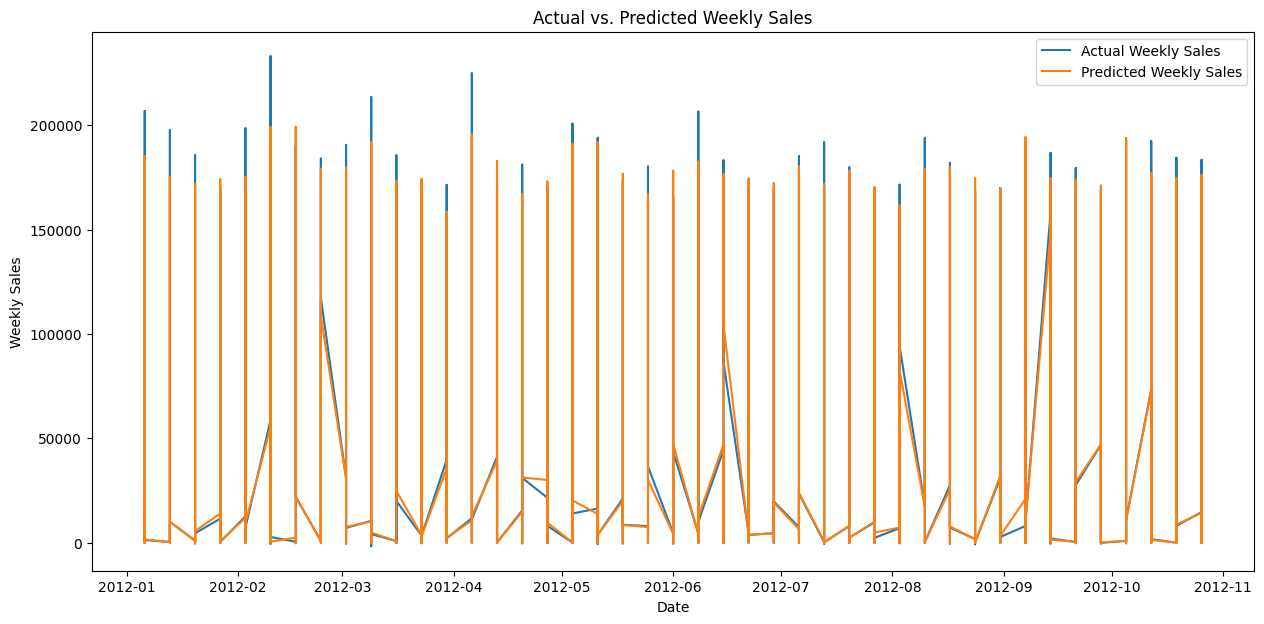

In [ ]:
import matplotlib.pyplot as plt

results_df = df_test_split[['Date', 'Weekly_Sales']].copy()
results_df['Predicted_Sales'] = best_model_predictions

results_df = results_df.sort_values(by='Date')

plt.figure(figsize=(15, 7))
plt.plot(results_df['Date'], results_df['Weekly_Sales'], label='Actual Weekly Sales')
plt.plot(results_df['Date'], results_df['Predicted_Sales'], label='Predicted Weekly Sales')
plt.title('Actual vs. Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

## Summary

### Key Takeaways and Next Steps
*   Analyze time periods where the predicted sales differ noticeably from actual sales to identify potential reasons, such as missing features or unusual events.  
*   Consider adding **external factors** like holidays, promotions, or economic indicators to improve the model’s forecasting accuracy.  
*   Experiment with additional features or model variations to capture trends and seasonality more effectively.  
